<a href="https://colab.research.google.com/github/PKpacheco/titanic-kaggle/blob/main/titanic_pk_pacheco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0374446 pkpacheco

In [346]:
# importing  libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import accuracy_score



In [347]:
# read the csv's
train_csv = "https://raw.githubusercontent.com/PKpacheco/titanic-kaggle/main/train.csv"
train_df = pd.read_csv(train_csv)

test_csv = "https://raw.githubusercontent.com/PKpacheco/titanic-kaggle/main/test.csv"
test_df = pd.read_csv(test_csv)

gender_csv = "https://raw.githubusercontent.com/PKpacheco/titanic-kaggle/main/gender_submission.csv"
gender_df = pd.read_csv(gender_csv)


Working on gender_df

In [348]:
# get the header
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [349]:
# Check for duplicate entries
print("Number of duplicate rows:", gender_df.duplicated().sum())


Number of duplicate rows: 0


Working on train_df and test_df

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    float64
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [351]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [352]:
df = pd.concat([train_df, test_df], axis=0)


In [353]:
# get the header
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [354]:
# Check for duplicate entries
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [355]:
missing_age_values = df['Age'].isnull().sum()
missing_age_values

263

In [356]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [357]:
((df.isnull().sum())/len(df))*100


PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

In [358]:
# remove some unnecessary features
df.drop(['PassengerId','Name','Ticket','Fare', 'Cabin'],axis=1, inplace=True)


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 81.8+ KB


In [360]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0.0,3,male,22.0,1,0,S
1,1.0,1,female,38.0,1,0,C
2,1.0,3,female,26.0,0,0,S
3,1.0,1,female,35.0,1,0,S
4,0.0,3,male,35.0,0,0,S


In [361]:
# map Embarked
change = {'S':0,'C':1,'Q':2}
df.Embarked = df.Embarked.map(change)

In [362]:
# Sex
change_s = {'female':0,'male':1}
df.Sex = df.Sex.map(change_s)

In [363]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0.0,3,1,22.0,1,0,0.0
1,1.0,1,0,38.0,1,0,1.0
2,1.0,3,0,26.0,0,0,0.0
3,1.0,1,0,35.0,1,0,0.0
4,0.0,3,1,35.0,0,0,0.0


In [364]:
df = df.dropna()
nan_check = df.isna().sum()
nan_check

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

Print some values and undertanding the data

<Axes: xlabel='Survived', ylabel='count'>

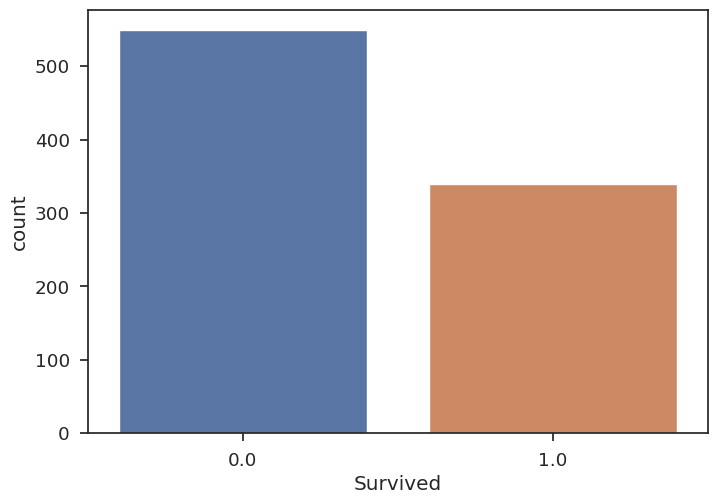

In [365]:
sns.countplot(data=df, x='Survived')

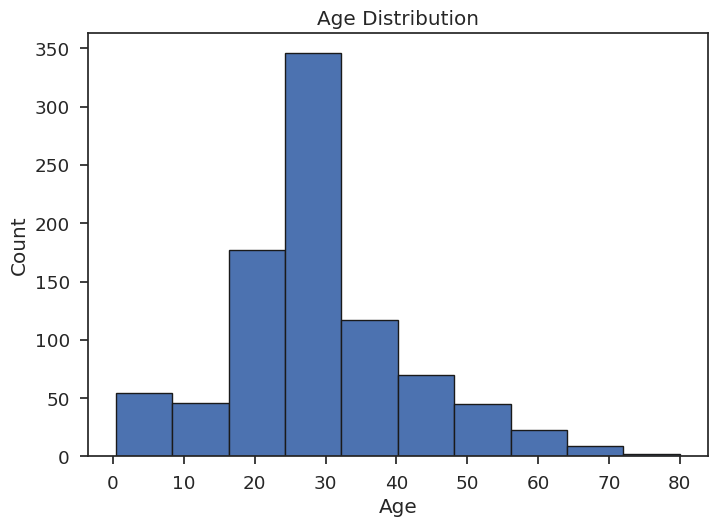

In [366]:
plt.hist(df['Age'], edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

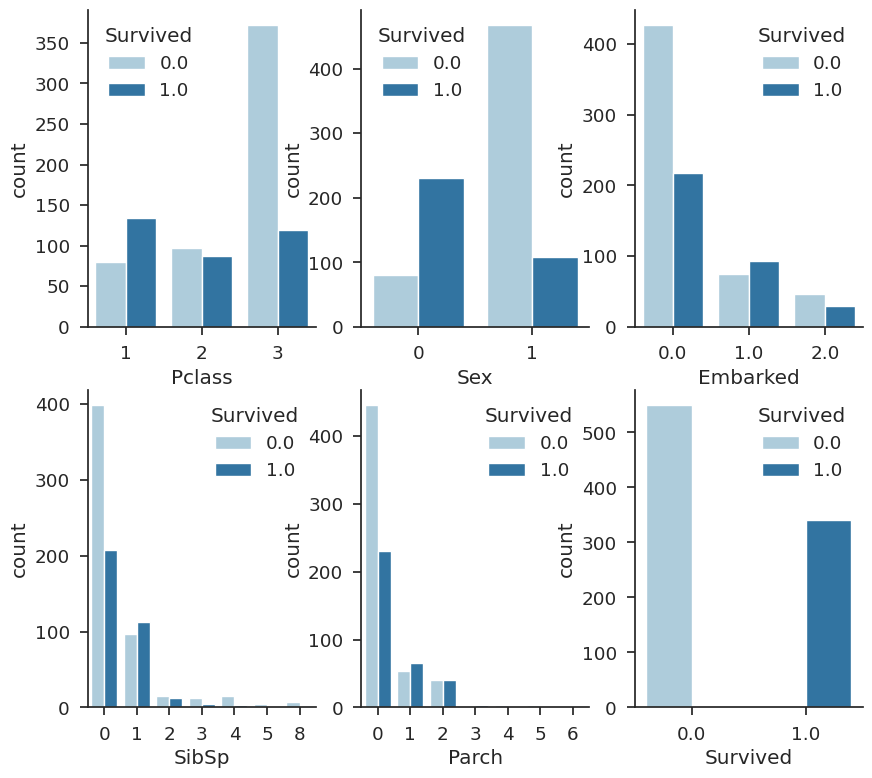

In [367]:
columns = ['Pclass', 'Sex','Embarked','SibSp', 'Parch','Survived']

plt.figure(figsize=(10, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=feature, hue='Survived', palette='Paired')

sns.despine()


In [368]:
# check the sex male
pd.pivot_table(df, values='Survived', index=['Sex'])

,Survived
Sex,
0,0.740385
1,0.188908


Split features and labels

In [369]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [370]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,0.0
1,1,0,38.0,1,0,1.0
2,3,0,26.0,0,0,0.0
3,1,0,35.0,1,0,0.0
4,3,1,35.0,0,0,0.0


In [371]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [372]:
# 10% separate for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [373]:
print("len of X_train:", len(X_train))
print("len of X_test:", len(X_test))
print("len of y_train:", len(y_train))
print("len of y_test:", len(y_test))

len of X_train: 800
len of X_test: 89
len of y_train: 800
len of y_test: 89


Standard scaler the features

In [374]:
# scaling
scaler=StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [375]:
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [376]:
scaled_X_train

array([[ 0.81591306,  0.72977192,  0.0084502 , -0.48275329, -0.47326627,
        -0.56537627],
       [ 0.81591306,  0.72977192,  0.09332608, -0.48275329, -0.47326627,
        -0.56537627],
       [ 0.81591306, -1.37029115, -0.58940577, -0.48275329, -0.47326627,
        -0.56537627],
       ...,
       [-1.57942804, -1.37029115,  1.3829307 , -0.48275329, -0.47326627,
        -0.56537627],
       [ 0.81591306, -1.37029115, -0.66526487,  1.28476448,  1.9852598 ,
        -0.56537627],
       [ 0.81591306,  0.72977192,  0.24504427, -0.48275329, -0.47326627,
        -0.56537627]])

In [377]:
scaled_X_test

array([[ 0.81591306,  0.72977192, -0.1342512 , -0.48275329, -0.47326627,
        -0.56537627],
       [-1.57942804, -1.37029115, -1.19627853,  0.40100559,  1.9852598 ,
        -0.56537627],
       [ 0.81591306, -1.37029115, -1.19627853,  0.40100559, -0.47326627,
         0.9942824 ],
       [-0.38175749,  0.72977192,  0.01746699, -0.48275329, -0.47326627,
        -0.56537627],
       [-1.57942804, -1.37029115, -0.89284215, -0.48275329,  1.9852598 ,
        -0.56537627],
       [ 0.81591306,  0.72977192, -0.2101103 , -0.48275329, -0.47326627,
        -0.56537627],
       [-0.38175749,  0.72977192, -0.36182849, -0.48275329, -0.47326627,
        -0.56537627],
       [ 0.81591306,  0.72977192, -0.66526487, -0.48275329, -0.47326627,
        -0.56537627],
       [-1.57942804, -1.37029115,  0.70019885,  0.40100559,  0.75599677,
         0.9942824 ],
       [-1.57942804, -1.37029115,  0.01746699, -0.48275329, -0.47326627,
         0.9942824 ],
       [-0.38175749,  0.72977192, -1.04456034, -0.

Model

In [378]:
model= DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

[Text(0.5089285714285714, 0.9, 'Pclass <= 0.5\ngini = 0.474\nsamples = 800\nvalue = [491, 309]\nclass = No Survived'),
 Text(0.2857142857142857, 0.7, 'Survived <= 2.5\ngini = 0.384\nsamples = 278\nvalue = [72, 206]\nclass = Survived'),
 Text(0.14285714285714285, 0.5, 'Sex <= 56.5\ngini = 0.09\nsamples = 149\nvalue = [7, 142]\nclass = Survived'),
 Text(0.07142857142857142, 0.3, 'Sex <= 23.5\ngini = 0.08\nsamples = 144\nvalue = [6, 138]\nclass = Survived'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 35\nvalue = [0, 35]\nclass = Survived'),
 Text(0.10714285714285714, 0.1, 'gini = 0.104\nsamples = 109\nvalue = [6, 103]\nclass = Survived'),
 Text(0.21428571428571427, 0.3, 'Survived <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = Survived'),
 Text(0.17857142857142858, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Survived'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No Survived'),
 Text(0.42857142857142855, 0.5, 'Parch <= 0.5\ngini = 0.

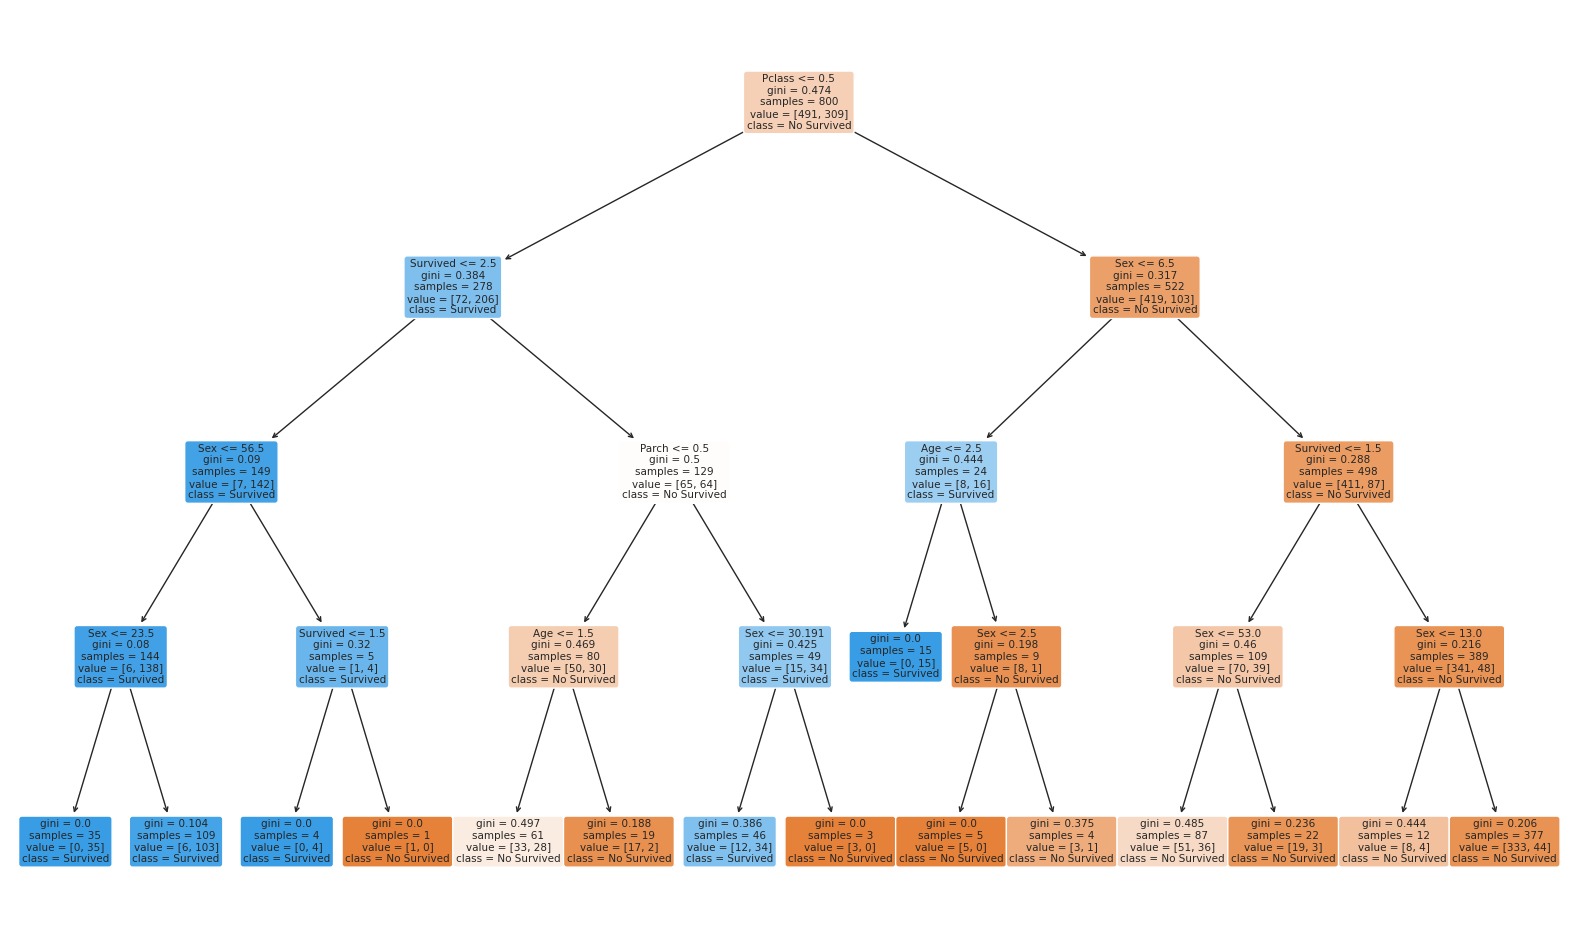

In [379]:
# Visualization
plt.figure(figsize=(20,12))
plot_tree(model, filled=True, rounded=True, class_names=["No Survived", "Survived"], feature_names=df.columns)

In [380]:
y_pred = model.predict(X_test)


In [381]:

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.87


In [382]:
confusion_matrix(y_test, y_pred)


array([[55,  3],
       [ 9, 22]])

* 55 -  True Negatives (TN) - correctly predicted as negative.
* 3 - False Positives (FP) - incorrectly predicted as positive.
* 9 -  False Negatives (FN) - incorrectly predicted as negative.
* 22 -  True Positives (TP) - correctly predicted as positive.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


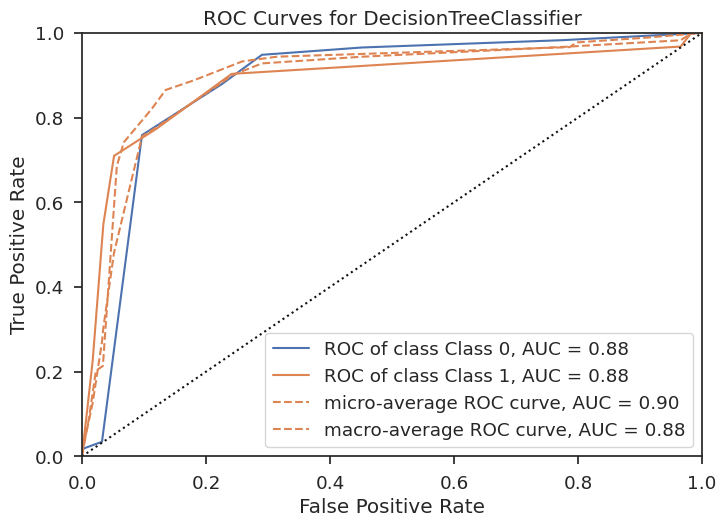

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [383]:
visualizer = ROCAUC(model, classes=["Class 0", "Class 1"])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

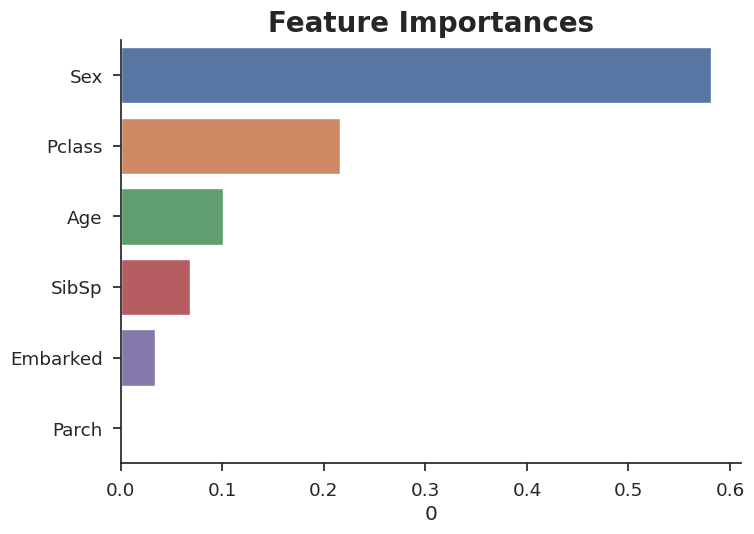

In [388]:

train_names = X_train.columns
importances = pd.DataFrame(model.feature_importances_, index = train_names)
importances.sort_values(by = 0, inplace=True, ascending = False)
importances = importances.iloc[0:6,:]

sns.barplot(x=0, y=importances.index, data=importances,palette="deep").set_title("Feature Importances",
                                                                                 fontdict= { 'fontsize': 20,
                                                                                            'fontweight':'bold'});
sns.despine()